###시작 전 이전 모델의 오류 예상
KNeighborRegressor은 해당 수치 근처의 점 n_neighbors개의 타깃 평균을 구하는 것임<br>
만약 훈련세트에서 조금 멀리 벗어 나는 값에 대해서는 예측이 정확하지 않기 때문에 값이 틀리게 나올 것 같다.

---
ex)<br>
최근접 값 3개: (30, 100), (30, 100), (30, 100)<br>
예측 해야되는 값: 50<br>
예측값: 100<br>
실행결과
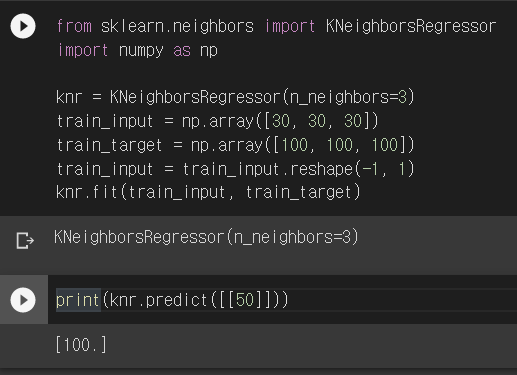
---
100, 200, 300을 넣어도 값이 100으로 나옴

# 선형 회귀

In [7]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input)
print(test_input)
# 2차원으로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input)
print(test_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [12]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [15]:
print(knr.predict([[50]]))

[1033.33333333]


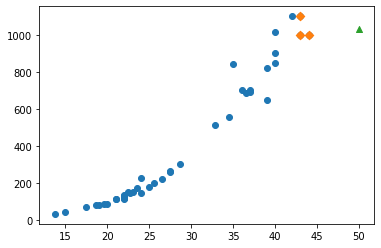

In [17]:
import matplotlib.pyplot as plt

indexes = knr.kneighbors([[50]], return_distance=False)
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.show()

In [18]:
print(knr.predict([[100]]))

[1033.33333333]


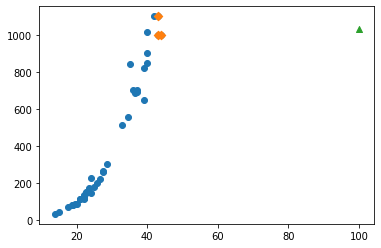

In [19]:
import matplotlib.pyplot as plt

indexes = knr.kneighbors([[100]], return_distance=False)
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


#선형 회귀 알고리즘이란?
훈련세트를 기반으로 $y = ax + b$를 구하는 것<br>
coef_ 와 intercept_ 를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터**라고 부른다.<br>
머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다. 이를 **모델 기반 학습**이라고 부른다.<br>
이전의 k-최근접 이웃에는 모델 파라미터가 없다. 훈련세트를 저장하는 것이 훈련의 전부였고 이를 **사례 기반 학습**이라고 부른다.

In [25]:
# lr.coef_가 numpy인 이유: 고차함수인 경우도 있기 때문
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


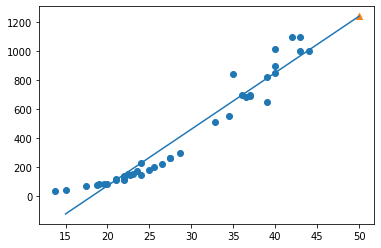

In [28]:
plt.scatter(train_input, train_target)
# 15부터 50까지의 길이와 선형 회귀로 얻은 target값의 직선
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.show()

In [29]:
# 전체적으로 과소적합
# 길이가 15일때 무게가 minus가 됨
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# 다항 회귀
다항 회귀도 선형 회귀라고 한다.<br>
다항 회귀는 2차 방정식이기도 하지만 $x^2$을 $z$로 바꾸면 $y = az + bx + c$로 되어 z와 x의 선형관계로 표현 할 수 있다.

In [34]:
# column_stack 사용 시
# *주의 ((리스트1, 리스트2)) 두 리스트를 묶어 1개의 튜플로 만들어줘야 함 
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [35]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [36]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


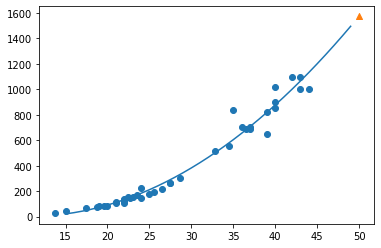

In [43]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.scatter(50, 1574, marker='^')
plt.show()

In [45]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
